## Import Libraries

In [1]:
import numpy as np # use numpy library to manipulate array easily
import pandas as pd # use pandas library to access csv file
import matplotlib.pyplot as plt  #use matplotlib library to easily make graph   
from matplotlib.legend_handler import HandlerBase  # use texthandler for legend plotting
from matplotlib.text import Text 
import seaborn as sns      # in order to use seaborn function count plot
from sklearn.model_selection import train_test_split # for train test split
import tensorflow as tf # for creating the NN model

sns.set_style('darkgrid')  #set the seaborn plot style to 'darkgrid'

## **Import the data**

In [2]:
data=pd.read_csv('divorce_data.csv',sep=';') 
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [3]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


## To seperate data and labels

In [4]:
y = data['Divorce'].copy() # Y represents output
X = data.drop('Divorce', axis=1).copy() # X represent data

## Make the graph to represent the percentage for each Question

In [ ]:
def without_hue(plot, feature): # plot percentage above each patch
    total = len(feature) # get the number record of each feature
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # compute percentage of each xtick label of patch
        x = p.get_x() + p.get_width() / 4
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12) # note percentage on the figure
    plt.show()

class TextHandler(HandlerBase): # text handler for legend plotting
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold") # set parameters of text in legend
        return [tx]

# commenting out drawing the plots
# i = 0 # iterating over 54 columns and plot graphics
# for column in data.columns[:-1]: # data.columns[:-1] represents 'Q1'~ 'Q54', except last column y
#     fig = plt.figure()
#     ax = sns.countplot(x=column, data=X) # seaborn countplot
    
#     handltext = [str(elem) for elem in np.arange(5)] # ["0", "1", "2", "3", "4"]
#     labels=["Never","Seldom","Averagely","Frequently","Always"]
#     t = ax.get_xticklabels() # get X-axis labels
#     labeldic = dict(zip(handltext, labels)) # zip handled text and labels to a dictionary
#     labels = [labeldic[h.get_text()]  for h in t]
#     handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)] # make Handltext(xticklabels) and patches into tuples 

#     ax.legend(handles, labels, handler_map={tuple : TextHandler()}) # the legend of seaborn. countplot 
    
#     without_hue(ax, data[column]) # pass the graph and each column from the dataset
#     # fig.savefig('ML_divorce_rate_dataset_plot'+ str(i)+'.jpg') 
#     # save figure plotted to a determined local directory
    
#     i += 1

## Split the dataset
Split the dataset into train (70%), test (15%) and cross validation (15%) sets

In [5]:
X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.3)
X_test, X_cv, y_test, y_cv = train_test_split(X_2, y_2, test_size=0.5)

# print the dataset sizes
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

(119, 54) (119,)
(25, 54) (25,)
(26, 54) (26,)


## Creating the Neural Network model using Tensorflow

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer with 128 hidden units
    
#     tf.keras.layers.Dropout(0.2), # regularization. Do later
    
    tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
])

model.summary() # display a summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


Loss function and optimizer settings

In [7]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Fit the parameters to the model

In [8]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7535 - accuracy: 0.6639
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8571
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8824
Epoch 4/5
4/4 [==============================] - 0s 998us/step - loss: 0.3175 - accuracy: 0.9412
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9664


# **Model Evaluation**

In [9]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
1/1 [==============================] - 0s 106ms/step - loss: 0.0973 - accuracy: 1.0000
test loss, test acc: [0.0973241925239563, 1.0]
Generate predictions for 3 samples
predictions shape: (3, 1)


# **Study the impact of different numbers of units on each layer on predict accuracy**


In [13]:
# Number of units selection
# set up the parameters of units
Units = [16, 32, 48, 64, 80, 96, 112, 128]
Results = np.zeros(8)

for i in range(len(Units)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(Units[i], activation='relu'), # hidden layer 1 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, Results[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", Results[i])
    

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.6134
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.6723
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7227
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7647
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7983
Evaluate on test data
1/1 [==============================] - 0s 83ms/step - loss: 0.4001 - accuracy: 0.8846
test acc: 0.8846153616905212
Epoch 1/5
4/4 [==============================] - 0s 997us/step - loss: 1.5977 - accuracy: 0.5210
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 1.0310 - accuracy: 0.5210
Epoch 3/5
4/4 [==============================] - 0s 997us/step - loss: 0.6580 - accuracy: 0.6555
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.8151
Epoc

# **The accuracy corresponding to the different number of units in each layer**

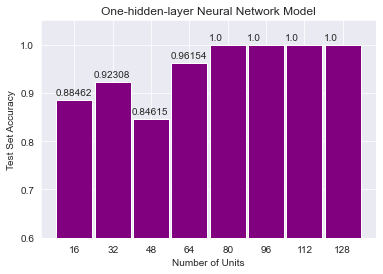

In [14]:
x_labels = ['16', '32', '48','64', '80', '96', '112', '128']
units_plot = plt.bar(Units, Results, color='purple',width=15, tick_label=x_labels) # plot the bar chart
Results_cp = np.round(Results, 5) # round the test result

# Text on the top of each bar
for i in range(len(Units)):
    plt.text(x = Units[i]-8 , y = Results[i]+0.01, s = Results_cp[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to 0.6
plt.xlabel("Number of Units")
plt.ylabel("Test Set Accuracy")
plt.title("One-hidden-layer Neural Network Model")
plt.savefig('ML_divorce_rate_units_selection_1.jpg') 

# **Two-hidden-layer with 32 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [15]:
# hidden layers selection
# 32 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units = [2, 4, 8, 16, 24, 32]
layer2_Results = np.zeros(6)

for i in range(len(layer2_Units)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(32, activation='relu'), # 32 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results[i])

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5966
Epoch 2/5
4/4 [==============================] - 0s 992us/step - loss: 0.5801 - accuracy: 0.8403
Epoch 3/5
4/4 [==============================] - 0s 997us/step - loss: 0.4911 - accuracy: 0.9496
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.9328
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.9328
Evaluate on test data
1/1 [==============================] - 0s 79ms/step - loss: 0.3577 - accuracy: 0.9231
test acc: 0.9230769276618958
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 3.8769 - accuracy: 0.5294
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 2.8248 - accuracy: 0.5294
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 1.8306 - accuracy: 0.5294
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.5294
Epoc

# **The accuracy corresponding to the different number of units in sencond layer(First layer 32 units)**

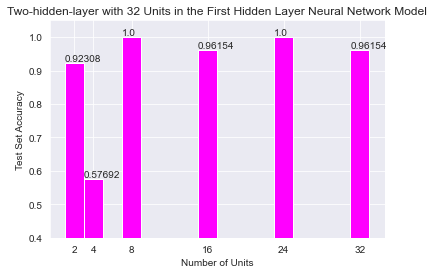

In [16]:
x_labels2 = ['2', '4', '8', '16', '24', '32']
units_plot2 = plt.bar(layer2_Units, layer2_Results, color='magenta',width=2, tick_label=x_labels2) # plot the bar chart
Results_cp2 = np.round(layer2_Results, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units)):
    plt.text(x = layer2_Units[i]-1 , y = layer2_Results[i]+0.005, s = Results_cp2[i], size = 10)

plt.ylim(ymin=0.4) # limit the y-axis minimum to 0.4
plt.xlabel("Number of Units")
plt.ylabel("Test Set Accuracy")
plt.title("Two-hidden-layer with 32 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection.jpg')

# **Two-hidden-layer with 48 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [17]:
# hidden layers selection
# 48 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units_2 = [2, 4, 8, 16, 24, 32, 48]
layer2_Results_2 = np.zeros(7)

for i in range(len(layer2_Units_2)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(48, activation='relu'), # 48 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units_2[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results_2[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results_2[i])

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.8487
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8739
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.9328
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.9664
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.9832
Evaluate on test data
1/1 [==============================] - 0s 81ms/step - loss: 0.4128 - accuracy: 1.0000
test acc: 1.0
Epoch 1/5
4/4 [==============================] - 1s 1ms/step - loss: 0.6690 - accuracy: 0.6387
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.8655
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.9160
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.9496
Epoch 5/5
4/4 [========

# **The accuracy corresponding to the different number of units in sencond layer(First layer 48 units)**

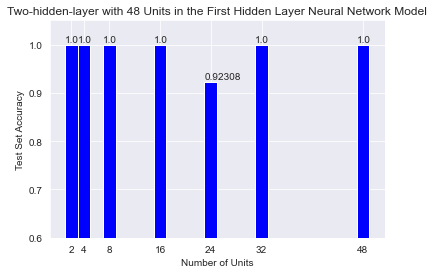

In [18]:
x_labels3 = ['2', '4', '8', '16', '24', '32', '48']
units_plot3 = plt.bar(layer2_Units_2, layer2_Results_2, color='blue',width=2, tick_label=x_labels3) # plot the bar chart
Results_cp3 = np.round(layer2_Results_2, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units_2)):
    plt.text(x = layer2_Units_2[i]-1 , y = layer2_Results_2[i]+0.005, s = Results_cp3[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to 0.6
plt.xlabel("Number of Units")
plt.ylabel("Test Set Accuracy")
plt.title("Two-hidden-layer with 48 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection2.jpg')

# **Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [19]:
# hidden layers selection
# 64 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units_3 = [2, 4, 8, 16, 32, 64]
layer2_Results_3 = np.zeros(6)

for i in range(len(layer2_Units_3)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(64, activation='relu'), # 64 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units_3[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results_3[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results_3[i])

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7929 - accuracy: 0.5462
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7395
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8487
Epoch 4/5
4/4 [==============================] - 0s 997us/step - loss: 0.4397 - accuracy: 0.9160
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.9580
Evaluate on test data
1/1 [==============================] - 0s 90ms/step - loss: 0.4148 - accuracy: 1.0000
test acc: 1.0
Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.8491 - accuracy: 0.5294
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7823 - accuracy: 0.5294
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7404 - accuracy: 0.5294
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5294
Epoch 5/5
4/4 [======

# **The accuracy corresponding to the different number of units in sencond layer(First layer 64 units)**

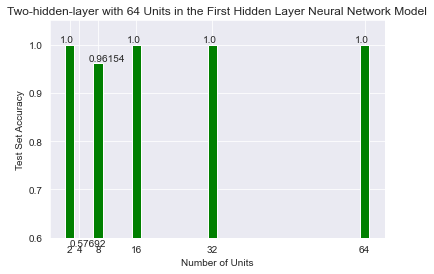

In [20]:
x_labels4 = ['2', '4', '8', '16', '32', '64']
units_plot4 = plt.bar(layer2_Units_3, layer2_Results_3, color='Green',width=2, tick_label=x_labels4) # plot the bar chart
Results_cp4 = np.round(layer2_Results_3, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units_3)):
    plt.text(x = layer2_Units_3[i]-2 , y = layer2_Results_3[i]+0.005, s = Results_cp4[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to b0.6
plt.xlabel("Number of Units")
plt.ylabel("Test Set Accuracy")
plt.title("Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection3.jpg')

# **One-hidden-layer with 64 Units Neural Network Model,Study the impact of different regularization value on predict accuracy.**

In [44]:
# hidden layers selection
# 64 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Results= np.zeros(6)
RegularizationTerm = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7]


# create the training model
for i in range(len(RegularizationTerm)):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(64, activation='relu'), # 64 units in hidden layer 1
        tf.keras.layers.Dropout(RegularizationTerm[i]), # regularization. 

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                      loss=loss_fn,
                      metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)

     # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results[i]= model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results[i])

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 1.5443 - accuracy: 0.5126
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7395
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8992
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8824
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.9076
Evaluate on test data
1/1 [==============================] - 0s 76ms/step - loss: 0.2679 - accuracy: 1.0000
test acc: 1.0
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 1.6312 - accuracy: 0.5294
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.7311
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9328
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9580
Epoch 5/5
4/4 [========

# **The accuracy corresponding to the different regularization value**


Text(0.5, 1.0, 'Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model')

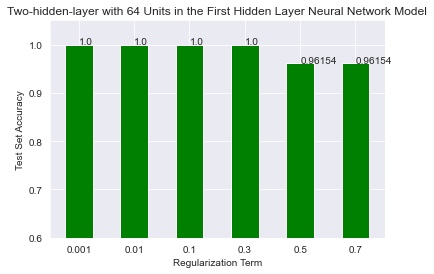

In [45]:
X = [1, 2, 3, 4, 5, 6]
RegularizationTerm = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7]
units_plot5 = plt.bar(X, layer2_Results, color='Green',width=0.5, tick_label=RegularizationTerm) # plot the bar chart
Results_cp5 = np.round(layer2_Results,5) # round the test result


# Text on the top of each bar
for i in range(len(RegularizationTerm)):
    plt.text(x = X[i], y = layer2_Results[i], s = Results_cp5[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to b0.6
plt.xlabel("Regularization Term")
plt.ylabel("Test Set Accuracy")
plt.title("Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model")